# Estudo sobre os cânceres de Mama e Ultero

**Contexto**

A partir dos dados gerados por instituições no Estado de São Paulo que, sob coordenação da FOSP, mantém o Registro Hospitalar de Câncer (RHC) implantado, forma-se a base de dados estadual do RHC, aqui disponibilizada.

O principal objetivo da Unidade de Epidemiologia da FOSP ao disponibilizar este Banco de Dados é o de ampliar o acesso à base estadual e poder oferecer aos usuários, em especial técnicos da área da saúde, a possibilidade de execução de tabulações e análises específicas, de acordo com seu interesse e necessidade.

Vale ressaltar que a cada três meses este Banco de Dados é atualizado uma vez que a sistemática implantada prevê que trimestralmente os hospitais enviem à FOSP os dados referentes a casos novos diagnosticados e seguimento dos já cadastrados. Desta forma, os arquivos aqui disponibilizados, serão atualizados com a mesma periodicidade.

Alguns outros pontos merecem destaque:

*   O Registro Hospitalar de Câncer do Estado de São Paulo cadastra casos novos diagnosticados a partir de 01/01/2000;
*   Consideram-se casos analíticos para o RHC aqueles que chegaram à Instituição sem tratamento (podendo estar diagnosticados ou não) e são estes os casos contidos no arquivo aqui disponibilizado.
*   Os dados coletados pelo RHC não devem e nem podem ser utilizados para cálculo de incidência, uma vez que retratam apenas o perfil de atendimento de uma determinada instituição (ou de um grupo destas).
*   O arquivo aqui disponibilizado não identifica pacientes e nem as Instituições em que foram atendidos, sendo possível, porém executar tabulações segundo município de residência.
*   Os tumores pediátricos diferenciam-se quanto à localização e morfologia em relação aos tumores em adultos e podem ser analisados segundo a Classificação Internacional do Câncer na Infância (CICI), que estabelece doze grandes agrupamentos de diagnóstico.

Devemos fazer um estudo sobre o Câncer usando como referência o Banco de Dados mantido pela Fundação Ococentro de São Paulo (FOSP).

Nesse estudo, devemos estudar dois tipos de cânceres importantes: colo do útero e câncer de mama.

O Banco de Dados a ser utilizado pode ser encontrado no endereço:

https://fosp.saude.sp.gov.br/fosp/diretoria-adjunta-de-informacao-e-epidemiologia/rhc-registro-hospitalar-de-cancer/banco-de-dados-do-rhc/

Use o arquivo **Banco_RHC_comppleto_(até_12/2022).**












In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1 - O arquivo está no formato dbf. Elabore uma rotina para a leitura e transformação desse formato dbf bold text para csv.**

In [41]:
# Instale a biblioteca simpledbf para ler arquivos *.dbf:
!pip install simpledbf

# Importando as bibliotecas
from simpledbf import Dbf5
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns



# Conectar ao arquivo *.dbf presente no drive
dbf = Dbf5('/content/drive/MyDrive/Portfólio/Estudo_Canceres_FOSP/paci21g.dbf', codec = 'latin')

# Transformando o arquivo *.dbf em *.csv
df = dbf.to_dataframe()

# Visualizar o data frame
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,1,0,2,SP,SP,3509502,CAMPINAS,1,2021-01-13,25,...,NaN,NaN,3509502,83703,CARCINOMA DO CORTEX SUPRARENAL,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1,Campinas
1,1,0,2,SP,SP,3509502,CAMPINAS,1,2021-01-13,25,...,NaN,NaN,3509502,95003,NEUROBLASTOMA SOE,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1,Campinas
2,1,0,1,SP,SP,3526902,LIMEIRA,2,2021-01-31,25,...,NaN,NaN,3509502,90803,TERATOMA MALIGNO SOE,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1,Campinas
3,1,0,2,SP,SP,3519055,HOLAMBRA,1,2021-02-19,25,...,NaN,NaN,3509502,95103,RETINOBLASTOMA SOE,15,UNACON exclusiva de Oncologia Pedi trica com S...,2,1,Campinas
4,1,0,2,SP,SP,3510500,CARAGUATATUBA,2,2021-01-10,28,...,NaN,NaN,3549904,95003,NEUROBLASTOMA SOE,5,UNACON exclusiva de Oncologia Pedi trica,2,1,SÆo Jose dos Campos


**2 - Pesquise os CIDs para colo do útero e câncer de mama. Crie um DF apenas com esses dois tipos de cancer.**

In [42]:
# Câncer de mama: CID-10 C50
# Colo do útero: CID-10 C53

# Criando um  unico dataframe que possua apenas os CIDs dos cânceres de mama e colo de útero
df_c50_c53 = df.query("TOPOGRUP in ['C50', 'C53']")

# Visualizar o dataframe 
df_c50_c53

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
633,2,12,2,SP,SP,3550308,SAO PAULO,1,2021-04-12,15,...,NaN,NaN,3550308,89103,RABDOMIOSSARCOMA EMBRIONARIO SOE,7,CACON com Servio de Oncologia Pedi trica,3,2,SÆo Paulo
851,4,17,2,MG,MG,3111101,CAMPINA VERDE,2,2021-01-21,99,...,NaN,NaN,3505500,80702,CARCINOMA ESCAMOCELULAR IN SITU SOE,7,CACON com Servio de Oncologia Pedi trica,3,2,Barretos
895,4,18,2,TO,TO,1705508,COLINAS DO TOCANTINS,2,2021-05-31,24,...,NaN,NaN,3505500,89103,RABDOMIOSSARCOMA EMBRIONARIO SOE,7,CACON com Servio de Oncologia Pedi trica,3,2,Barretos
908,3,18,2,SP,SP,3503307,ARARAS,1,2021-08-10,15,...,NaN,NaN,3503307,80003,NEOPLASIA MALIGNA,1,UNACON,1,1,Araras
1012,2,21,2,SP,SP,3550308,SAO PAULO,2,2021-06-09,15,...,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,9,UNACON com Servios de Radioterapia e de Hemat...,1,1,SÆo Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42284,2,94,2,SP,SP,3525300,JAU,2,2021-07-19,23,...,NaN,NaN,3525300,85003,CARCINOMA DUCTAL INFILTRANTE SOE,7,CACON com Servio de Oncologia Pedi trica,3,2,Jau
42306,4,95,2,SP,SP,3550308,SAO PAULO,1,2021-10-07,15,...,NaN,NaN,3550308,80703,CARCINOMA ESCAMOCELULAR SOE,7,CACON com Servio de Oncologia Pedi trica,3,2,SÆo Paulo
42361,2,97,2,PE,SP,3554102,TAUBATE,2,2021-07-05,33,...,NaN,NaN,3554102,85213,CARCINOMA DUCTULAR INFILTRANTE,9,UNACON com Servios de Radioterapia e de Hemat...,1,1,Taubate
42363,9,97,2,SP,SP,3550308,SAO PAULO,2,2021-08-31,33,...,NaN,NaN,3550308,85003,CARCINOMA DUCTAL INFILTRANTE SOE,6,CACON,3,2,SÆo Paulo


**3 - Faça um tratamento das células em branco e/ou que contenham valores inconsistentes.**


In [43]:
# Filtrando apenas as colunas que serão utilizas para a analise
# Especifique as colunas desejadas
colunas_desejadas = ['CIDADE',  'CATEATEND', 'DTDIAG', 'DTTRAT', 'TRATHOSP', 'TRATAMENTO', 'ULTINFO']

# Selecione apenas as colunas desejadas no DataFrame
df_c50_c53 = df_c50_c53.filter(items=colunas_desejadas)

# Visualizar o data frame
df_c50_c53

,CIDADE,CATEATEND,DTDIAG,DTTRAT,TRATHOSP,TRATAMENTO,ULTINFO
633,SAO PAULO,1,2021-03-15,2021-05-20,E,E,2
851,CAMPINA VERDE,2,2021-01-21,NaN,J,J,1
895,COLINAS DO TOCANTINS,2,2021-04-12,2021-08-26,F,F,2
908,ARARAS,1,2021-07-21,2021-08-10,C,C,1
1012,SAO PAULO,2,2021-04-27,2021-06-16,F,F,3
...,...,...,...,...,...,...,...
42284,JAU,2,2021-07-19,2021-09-03,I,I,3
42306,SAO PAULO,1,2021-11-09,2022-01-05,B,B,2
42361,TAUBATE,2,2021-05-11,2021-12-03,I,I,3
42363,SAO PAULO,2,2021-07-30,2021-09-09,I,I,1


In [44]:
# Exibir informações do DataFrame
print(df_c50_c53.info())

print('___________________________________________ \n')

# Exibir contagem de valores ausentes em cada coluna
print(df_c50_c53.isna().sum(),'\n')

# Era esperado que a coluna DTTRAT, que retorna a data de inicio do tratamento, possua valores vazios já que existem paciêntes que não realizam o tratamento.
# Para verificar a veracidade desses valores será feita uma correalção entre as colunas DTTRAT e TRATAMENTO
valores_consistentes = df_c50_c53[(df_c50_c53.TRATAMENTO=='J') | (df_c50_c53.DTTRAT=='')]

print(f"Analise: Dos {df_c50_c53['DTTRAT'].isna().sum()} valores vazios da coluna DTTRAT {valores_consistentes.shape[0]} são coesos")

# Como a quantidade de valores incosistentes é muito baixa se comparada a quantidade total de linhas (204785) não será aplicado nenhum tratamento.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6988 entries, 633 to 42386
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CIDADE      6988 non-null   object
 1   CATEATEND   6988 non-null   int64 
 2   DTDIAG      6988 non-null   object
 3   DTTRAT      6747 non-null   object
 4   TRATHOSP    6988 non-null   object
 5   TRATAMENTO  6988 non-null   object
 6   ULTINFO     6988 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 436.8+ KB
None
___________________________________________ 

CIDADE          0
CATEATEND       0
DTDIAG          0
DTTRAT        241
TRATHOSP        0
TRATAMENTO      0
ULTINFO         0
dtype: int64 

Analise: Dos 241 valores vazios da coluna DTTRAT 241 são coesos


**4 -Utilizando o dicionário de dados disponível no Open LMS, resposta:**

**a - Quantos pacientes não tratados morreram de câncer em 2022?**

**b - Quantos pacientes não tratados morreram no total de 2022?**

**c - Quantos pacientes tratados/em tratamento morreram de câncer em 2022?**

**d - Quantos pacientes tratados/em tratamento morreram no total em 2022?**

In [45]:
# Preparando o ambiente para usar SQL
# Criando um banco de dados
Conexao = sqlite3.connect('Banco_Dados')

# Criando a variavel cursor utilizada para apontar para o banco de dados
Cursor = Conexao.cursor()

# Gravar o DataFrame em uma tabela do SQLite
df.to_sql('df_c50_c53', Conexao, if_exists='replace', index=False)

42407

```
Domínio da coluna ULTINFO:
1 – VIVO, COM CÂNCER
2 – VIVO, SOE
3 – OBITO POR CANCER
4 – OBITO POR OUTRAS CAUSAS, SOE

Dominio da coluna TRATAMENTO:
A – Cirurgia
B – Radioterapia
C – Quimioterapia
D – Cirurgia + Radioterapia
E – Cirurgia + Quimioterapia
F – Radioterapia + Quimioterapia
G – Cirurgia + Radio + Quimio
H – Cirurgia + Radio + Quimio + Hormonio
I – Outras combinações de tratamento
J – Nenhum tratamento realizado
```



In [46]:
# a - Quantos pacientes não tratados morreram de câncer em 2022? --> ULTINFO(3) & TRATAMENTO(J)
Consulta_4a = Cursor.execute('''
SELECT COUNT(*) FROM df_c50_c53 
WHERE ULTINFO = '3' AND TRATAMENTO = 'J';
''').fetchall()
resultado_4a = Consulta_4a[0][0] # Acessamos a primeira tupla da lista ao utilizar "Consulta1[0]" e em seguida o primeiro elemento da tupla ao utilizar "[0]" novamente.



# b - Quantos pacientes não tratados morreram no total de 2022? --> ULTINFO(3, 4) & TRATAMENTO(J)
Consulta_4b = Cursor.execute('''
SELECT COUNT(*) FROM df_c50_c53 
WHERE ULTINFO IN (3, 4) AND TRATAMENTO = 'J';
''').fetchall()
resultado_4b = Consulta_4b[0][0]



# c - Quantos pacientes tratados/em tratamento morreram de câncer em 2022? --> ULTINFO(3) & TRATAMENTO(A, B, C, D, E, F, G, H, I)
Consulta_4c = Cursor.execute('''
SELECT COUNT(*) FROM df_c50_c53 
WHERE ULTINFO = '3' AND TRATAMENTO IN ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I');
''').fetchall()
resultado_4c = Consulta_4c[0][0]



# d - Quantos pacientes tratados/em tratamento morreram no total em 2022? --> ULTINFO(3, 4) & TRATAMENTO(A, B, C, D, E, F, G, H, I)
Consulta_4d = Cursor.execute('''
SELECT COUNT(*) FROM df_c50_c53 
WHERE ULTINFO IN (3, 4) AND TRATAMENTO IN ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I');
''').fetchall()
resultado_4d = Consulta_4d[0][0]



# Imprimindo as respostas
print(f'a) {resultado_4a:.0f} pacientes que NÃO receberam tratamento morreram de cancer em 2022')
print(f'b) {resultado_4b:.0f} pacientes que NÃO receberam tratamento morreram de cancer ou de outras causas em 2022')
print(f'c) {resultado_4c:.0f} pacientes que receberam tratamento morreram de cancer em 2022')
print(f'd) {resultado_4d:.0f} pacientes que receberam tratamento morreram de cancer ou de outras causas em 2022')

a) 2381 pacientes que NÃO receberam tratamento morreram de cancer em 2022
b) 2706 pacientes que NÃO receberam tratamento morreram de cancer ou de outras causas em 2022
c) 4674 pacientes que receberam tratamento morreram de cancer em 2022
d) 5834 pacientes que receberam tratamento morreram de cancer ou de outras causas em 2022


**5 - Utilizando o dicionário de dados disponível no site do FOSP:**

**a - Classifique, em ordem decrescente, os tipos de tratamento de câncer em 2022. Exiba esses resultados na forma numérica e gráfica.**

**b - Classifique, em ordem decrescente, os tipos de tratamento de câncer realizados no hospital em 2022. Exiba esses resultados na forma numérica e gráfica.**


In [47]:
# Classificando, em ordem decrescente, os tratamento de câncer realizados com vezes em 2022
Consulta_5a = Cursor.execute('''
SELECT 
    CASE TRATAMENTO 
        WHEN 'A' THEN 'Cirurgia' 
        WHEN 'B' THEN 'Radioterapia' 
        WHEN 'C' THEN 'Quimioterapia' 
        WHEN 'D' THEN 'Cirurgia + Radioterapia' 
        WHEN 'E' THEN 'Cirurgia + Quimioterapia' 
        WHEN 'F' THEN 'Radioterapia + Quimioterapia' 
        WHEN 'G' THEN 'Cirurgia + Radio + Quimio' 
        WHEN 'H' THEN 'Cirurgia + Radio + Quimio + Hormonio' 
        WHEN 'I' THEN 'Outras combinações de tratamento' 
        WHEN 'J' THEN 'Nenhum tratamento realizado' 
        ELSE 'Tratamento Desconhecido' 
    END AS NOME_TRATAMENTO, 
    COUNT(*) AS QUANTIDADE_PACIENTE 
FROM df_c50_c53 
GROUP BY TRATAMENTO 
ORDER BY COUNT(*) DESC;
  ''').fetchall()

# Gerando um data frame
df_5a = pd.DataFrame(Consulta_5a, columns=['Tipo de Tratamento', 'Quantidade de Pacientes'])
df_5a

,Tipo de Tratamento,Quantidade de Pacientes
0,Cirurgia,16491
1,Outras combinações de tratamento,6171
2,Quimioterapia,5362
3,Nenhum tratamento realizado,4005
4,Cirurgia + Quimioterapia,3008
5,Radioterapia + Quimioterapia,2721
6,Cirurgia + Radio + Quimio,1494
7,Radioterapia,1394
8,Cirurgia + Radioterapia,1298
9,Cirurgia + Radio + Quimio + Hormonio,463


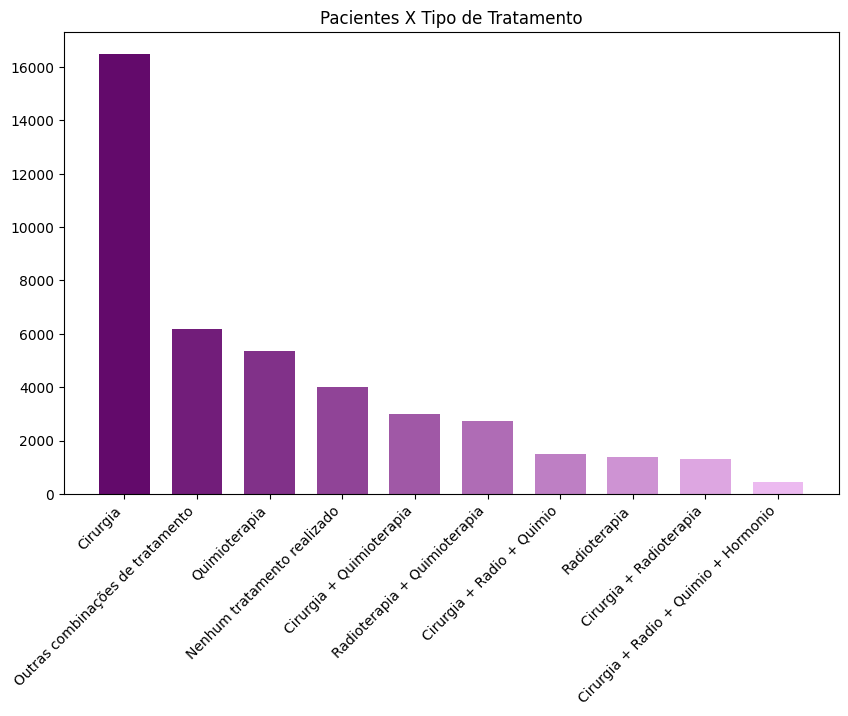

In [48]:
# Gráfico dos tipos de tratamento de câncer em 2022

# Criando duas listas, uma para os valores do eixo x e outra para os valores do eixo y
tratamento = [linha[0] for linha in Consulta_5a]
quant_paciente = [linha[1] for linha in Consulta_5a]

# Define a largura da barra
largura_barra = 0.7

# Cria uma palheta de cores, a paleta de cores resultante terá uma transição linear entre as duas cores especificadas.
paleta_cores = mcolors.LinearSegmentedColormap.from_list("Palheta Rosa", ['#630A6B', '#FBCDFF'])

# Cria um objeto para mapear os valores do eixo x no intervalo de 0 ao número total de tratamentos(len(tratamentos)). 
norm = mcolors.Normalize(vmin=0, vmax=len(tratamento))

# Utiliza os 2 parametros anteriores para Ele será utilizado para atribuir cores às barras do gráfico de acordo com sua posição no eixo x.
cores = plt.cm.ScalarMappable(norm=norm, cmap=paleta_cores).to_rgba(np.arange(len(tratamento)))

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Criado um array de índices com base no número de tratamentos disponíveis. Esses índices serão utilizados para posicionar as barras no gráfico.
indices = np.arange(len(tratamento))

# Cria o gráfico de barras
plt.bar(indices, quant_paciente, width=largura_barra, color=cores)

# Define o titulo do gráfico
plt.title('Pacientes X Tipo de Tratamento')

# Rotaciona os nomes do eixo x em 45 graus
plt.xticks(indices, tratamento, rotation=45, ha='right')

# Plota o gráfico
plt.show()


In [49]:
# Classificando, em ordem decrescente, os tipos de tratamento de câncer realizados nos hospitais em 2022
Consulta_5b = Cursor.execute('''
SELECT 
    CASE TRATHOSP 
        WHEN 'A' THEN 'Cirurgia' 
        WHEN 'B' THEN 'Radioterapia' 
        WHEN 'C' THEN 'Quimioterapia' 
        WHEN 'D' THEN 'Cirurgia + Radioterapia' 
        WHEN 'E' THEN 'Cirurgia + Quimioterapia' 
        WHEN 'F' THEN 'Radioterapia + Quimioterapia' 
        WHEN 'G' THEN 'Cirurgia + Radio + Quimio' 
        WHEN 'H' THEN 'Cirurgia + Radio + Quimio + Hormonio' 
        WHEN 'I' THEN 'Outras combinações de tratamento' 
        WHEN 'J' THEN 'Nenhum tratamento realizado' 
        ELSE 'Tratamento Desconhecido' 
    END AS NOME_TRATAMENTO, 
    COUNT(*) AS QUANTIDADE_PACIENTE 
FROM df_c50_c53 
GROUP BY TRATAMENTO 
ORDER BY COUNT(*) DESC;
  ''').fetchall()

# Gerando um data frame
df_5b = pd.DataFrame(Consulta_5b, columns=['Tipo de Tratamento', 'Quantidade de Pacientes'])
df_5b

,Tipo de Tratamento,Quantidade de Pacientes
0,Cirurgia,16491
1,Quimioterapia,6171
2,Quimioterapia,5362
3,Nenhum tratamento realizado,4005
4,Cirurgia + Quimioterapia,3008
5,Radioterapia + Quimioterapia,2721
6,Cirurgia + Radio + Quimio,1494
7,Radioterapia,1394
8,Cirurgia + Radioterapia,1298
9,Outras combinações de tratamento,463


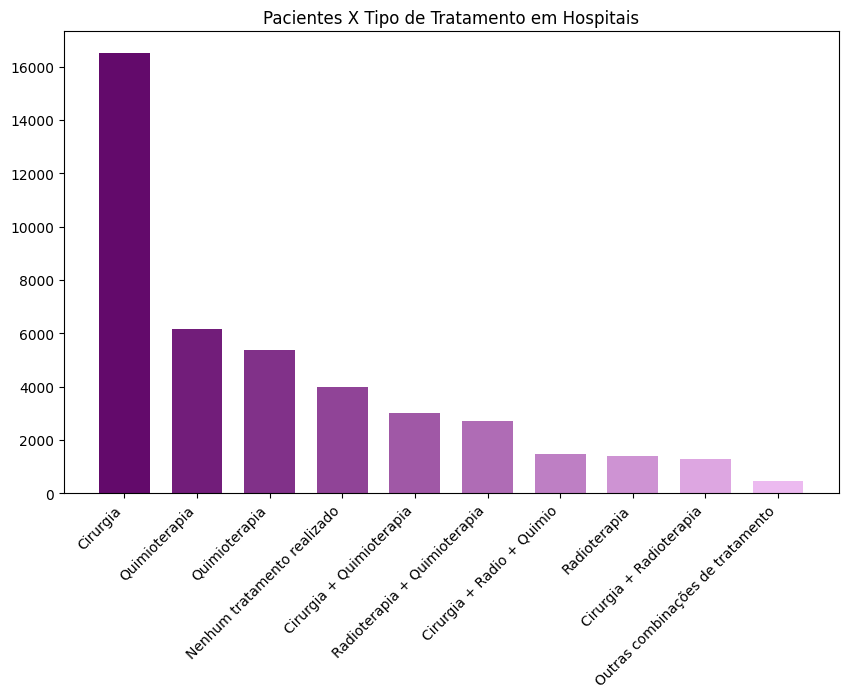

In [50]:
# Gráfico dos tipos de tratamento de câncer realizados nos hospitais em 2022

# Criando duas listas, uma para os valores do eixo x e outra para os valores do eixo y
tratamento = [linha[0] for linha in Consulta_5b]
quant_paciente = [linha[1] for linha in Consulta_5b]

# Define a largura da barra
largura_barra = 0.7

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Criado um array de índices com base no número de tratamentos disponíveis. Esses índices serão utilizados para posicionar as barras no gráfico.
indices = np.arange(len(tratamento))

# Cria o gráfico de barras
plt.bar(indices, quant_paciente, width=largura_barra, color=cores)

# Define o titulo do gráfico
plt.title('Pacientes X Tipo de Tratamento em Hospitais')

# Rotaciona os nomes do eixo x em 45 graus
plt.xticks(indices, tratamento, rotation=45, ha='right')

# Plota o gráfico
plt.show()

**6 - Utilizando o dicionário de dados disponível no site do FOSP:**

**a - Existe alguma correlação entre a data do diagnóstico e o total de óbivos? Justifique sua resposta com uma ou mais análises.**

**b - Existe alguma correlação entre a data de ínicio de tratamento e o total de óbitos? Justifique sua resposta com uma ou mais análises.**



In [79]:
# Criando um data frame apenas com paciêntes que vieram a obto por câncer
df_6a = df_c50_c53.query("ULTINFO in [3]")

# Converter a coluna de datas para o formato datetime
df_6a['DTDIAG'] = pd.to_datetime(df_6a['DTDIAG'])

# Extrair apenas o mês das datas de diagnóstico
df_6a['MESDIAG'] = df_6a['DTDIAG'].dt.month

# Contar a quantidade de vezes que cada mês se repete
contagem = df_6a['MESDIAG'].value_counts().sort_index()

# Dicionário de mapeamento de números para nomes de meses
STRMES = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Contar a quantidade de vezes que cada mês se repete
contagem = df_6a['MESDIAG'].value_counts().sort_index()

# Criar um novo DataFrame com os meses e a quantidade de vezes que se repetem
df_6a = pd.DataFrame({'MESDIAG': contagem.index, 'OBTOS': contagem.values})

# Definir a coluna "Mês" como uma coluna categórica na ordem cronológica
df_6a['MESDIAG'] = pd.Categorical(df_6a['MESDIAG'].map(STRMES), categories=STRMES.values(), ordered=True)

df_6a

<ipython-input-79-04ab14469d82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6a['DTDIAG'] = pd.to_datetime(df_6a['DTDIAG'])
<ipython-input-79-04ab14469d82>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6a['MESDIAG'] = df_6a['DTDIAG'].dt.month


,MESDIAG,OBTOS
0,Janeiro,58
1,Fevereiro,59
2,Março,64
3,Abril,56
4,Maio,43
5,Junho,49
6,Julho,40
7,Agosto,52
8,Setembro,41
9,Outubro,22


In [78]:
# Analisando a correlação entre MESDIAG e OBTOS

# Criar um novo DataFrame com os meses(Dtype: int) e a quantidade de vezes que se repetem (Dtype: int) para contar os obtos.
df_6a_corr = pd.DataFrame({'MESDIAG': contagem.index, 'OBTOS': contagem.values})

# Utilizado o DataFrame a cima visualizar o nível e o tipo de correlação entre as colunas
print(df_6a_corr.corr(), 2*'\n')

          MESDIAG     OBTOS
MESDIAG  1.000000 -0.884993
OBTOS   -0.884993  1.000000 




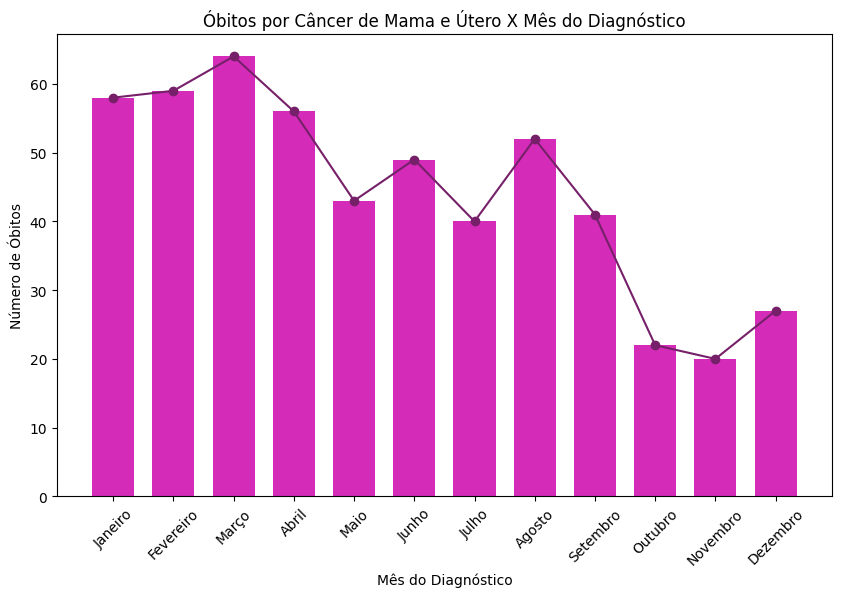

In [75]:
# Gráfico do número de óbitos por mês do diagnóstico

# Configurações do gráfico de barras
largura_barra = 0.7

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Criação do gráfico de barras
plt.bar(df_6a['MESDIAG'], df_6a['OBTOS'], width=largura_barra, color='#D42CB9')

# Configurações do gráfico de linha
plt.plot(df_6a['MESDIAG'], df_6a['OBTOS'], marker='o', linestyle='-', color='#762069')

# Configurações do eixo x
plt.xticks(rotation=45)

# Configurações do título e dos rótulos dos eixos
plt.title('Óbitos por Câncer de Mama e Útero X Mês do Diagnóstico')
plt.xlabel('Mês do Diagnóstico')
plt.ylabel('Número de Óbitos')

# Exibição do gráfico
plt.show()

**6a - Conclusão**

Com base na visualização do gráfico e na correlação entre colunas, podemos observar que o número de óbitos por cancer de mama e colo de útero é menor nos últimos meses do ano.

Isso ocorre pois os dados mostram o número de óbitos acumulados ao longo do tempo, é esperado que os últimos meses apresentem uma menor quantidade de óbitos, uma vez que os pacientes diagnosticados nesse período ainda estão em estágios iniciais de tratamento ou não tiveram tempo para progredir para estágios avançados da doença e vir a óbto.

In [82]:
# Criando um data frame apenas com paciêntes que vieram a obto por câncer
df_6b = df_c50_c53.query("ULTINFO in [3]")

# Converter a coluna de datas para o formato datetime
df_6b['DTTRAT'] = pd.to_datetime(df_6b['DTTRAT'])

# Extrair apenas o mês das datas de diagnóstico
df_6b['MESTRAT'] = df_6b['DTTRAT'].dt.month

# Contar a quantidade de vezes que cada mês se repete
contagem = df_6b['MESTRAT'].value_counts().sort_index()

# Dicionário de mapeamento de números para nomes de meses
STRMES = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Contar a quantidade de vezes que cada mês se repete
contagem = df_6b['MESTRAT'].value_counts().sort_index()

# Criar um novo DataFrame com os meses e a quantidade de vezes que se repetem
df_6b = pd.DataFrame({'MESTRAT': contagem.index, 'OBTOS': contagem.values})

# Definir a coluna "Mês" como uma coluna categórica na ordem cronológica
df_6b['MESTRAT'] = pd.Categorical(df_6b['MESTRAT'].map(STRMES), categories=STRMES.values(), ordered=True)

df_6b

<ipython-input-82-94ea4723f5bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6b['DTTRAT'] = pd.to_datetime(df_6b['DTTRAT'])
<ipython-input-82-94ea4723f5bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6b['MESTRAT'] = df_6b['DTTRAT'].dt.month


,MESTRAT,OBTOS
0,Janeiro,17
1,Fevereiro,24
2,Março,41
3,Abril,51
4,Maio,40
5,Junho,40
6,Julho,47
7,Agosto,35
8,Setembro,25
9,Outubro,31


In [83]:
# Analisando a correlação entre MESDIAG e OBTOS

# Criar um novo DataFrame com os meses(Dtype: int) e a quantidade de vezes que se repetem (Dtype: int) para contar os obtos.
df_6b_corr = pd.DataFrame({'MESTRAT': contagem.index, 'OBTOS': contagem.values})

# Utilizado o DataFrame a cima visualizar o nível e o tipo de correlação entre as colunas
print(df_6b_corr.corr(), 2*'\n')

          MESTRAT     OBTOS
MESTRAT  1.000000  0.117506
OBTOS    0.117506  1.000000 




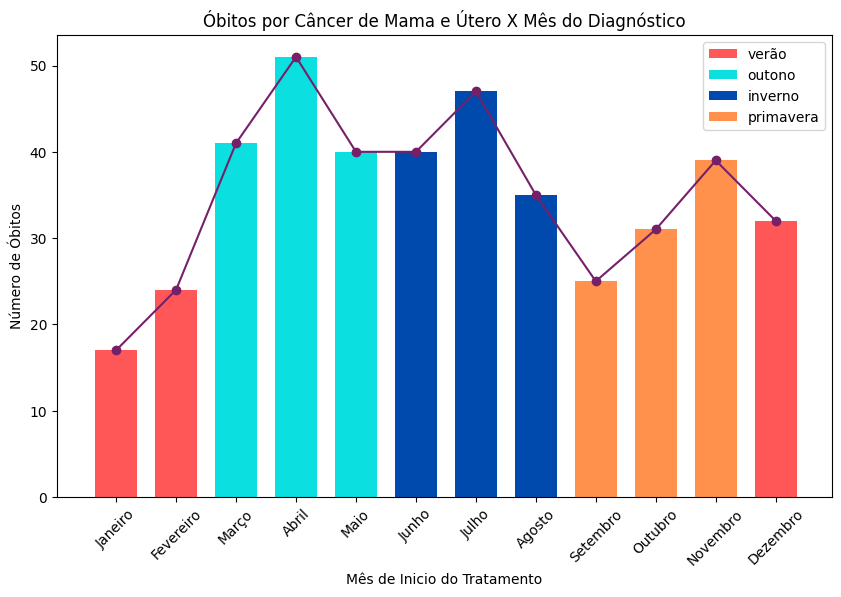

In [106]:
# Gráfico do número de óbitos por mês do inicio de tratamento

# Configurações do gráfico de barras
largura_barra = 0.7

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

cores_estacoes = ['#FF5757', '#FF5757', '#0CDFDF', '#0CDFDF', '#0CDFDF', '#004AAD', '#004AAD', '#004AAD', '#FF914D', '#FF914D', '#FF914D', '#FF5757']

# Criação do gráfico de barras
plt.bar(df_6b['MESTRAT'], df_6b['OBTOS'], width=largura_barra, color=cores_estacoes)

# Configurações do gráfico de linha
plt.plot(df_6b['MESTRAT'], df_6b['OBTOS'], marker='o', linestyle='-', color='#762069')

# Configurações do eixo x
plt.xticks(rotation=45)

# Legenda das cores das estações
legenda_cores = {'verão': '#FF5757', 'outono': '#0CDFDF', 'inverno': '#004AAD', 'primavera': '#FF914D'}

# Criação da legenda
legenda = []
for estacao, cor in legenda_cores.items():
    legenda.append(plt.bar(0, 0, color=cor, label=estacao))

# Exibição da legenda
plt.legend(handles=legenda, loc='upper right')

# Configurações do título e dos rótulos dos eixos
plt.title('Óbitos por Câncer de Mama e Útero X Mês do Diagnóstico')
plt.xlabel('Mês de Inicio do Tratamento')
plt.ylabel('Número de Óbitos')

# Exibição do gráfico
plt.show()

In [118]:
# Agrupando os dados por trimestre e calculando a soma dos óbitos
ESTACOES = {
    'Verão': ['Dezembro', 'Janeiro', 'Fevereiro'],
    'Outono': ['Março', 'Abril', 'Maio'],
    'Inverno': ['Junho', 'Julho', 'Agosto'],
    'Primavera': ['Setembro', 'Outubro', 'Novembro']
}

# Cria uma nova coluna "Trimestre" no dataframe `df_6a`, onde cada valor é o trimestre correspondente ao mês do diagnóstico
df_6b['ESTACOES'] = df_6b['MESTRAT'].apply(lambda x: next(key for key, value in ESTACOES.items() if x in value))

# Calcula a soma dos óbitos por trimestre, agrupando os dados pela coluna "Trimestre"
df_agrupado = df_6b.groupby('ESTACOES')['OBTOS'].sum()

# Exibindo o resultado
df_agrupado

ESTACOES
Inverno      122
Outono       132
Primavera     95
Verão         73
Name: OBTOS, dtype: int64

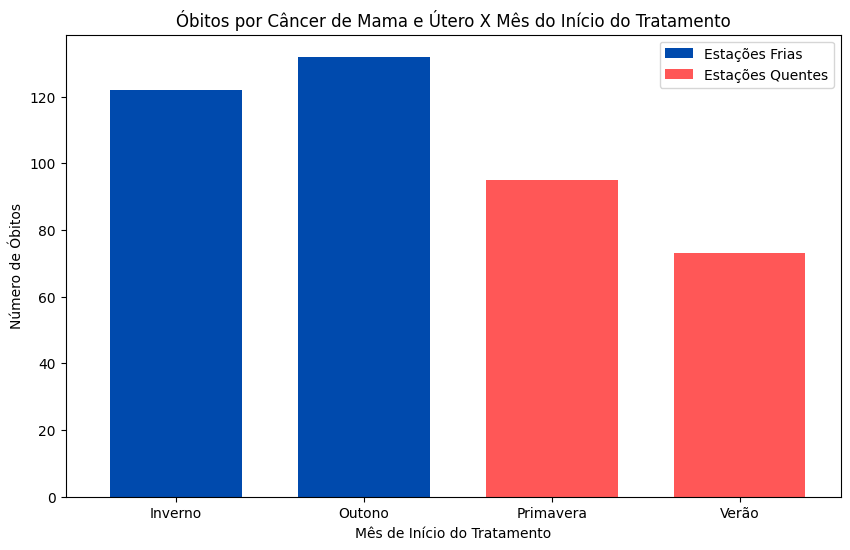

In [135]:
# Gráfico do número de óbitos por mês do início de tratamento

# Configurações do gráfico de barras
largura_barra = 0.7

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

cores_estacoes = ['#004AAD', '#004AAD', '#FF5757','#FF5757']

# Criação do gráfico de barras
plt.bar(df_agrupado.index, df_agrupado.values, width=largura_barra, color=cores_estacoes)

# Legenda das cores das estações
legenda_cores = {'Estações Frias': '#004AAD', 'Estações Quentes': '#FF5757'}

# Criação da legenda
legenda = []
for estacao, cor in legenda_cores.items():
    legenda.append(plt.bar(0, 0, color=cor, label=estacao))

# Exibição da legenda
plt.legend(handles=legenda, loc='upper right')

# Configurações do título e dos rótulos dos eixos
plt.title('Óbitos por Câncer de Mama e Útero X Mês do Início do Tratamento')
plt.xlabel('Mês de Início do Tratamento')
plt.ylabel('Número de Óbitos')

# Exibição do gráfico
plt.show()

**6b - Conclusão**

Apesar da correlação entre colunas de mês de inicio de tratamento e óbtos apresentar um valor inconsistente, é possível concluir através das análises gráficos que no inverno e no outono, meses mais frios, a taxa de mortalidade aumentou concideravelmente.

Esse padrão ocorre devido a queda de temperatura, que compromete a imunidade dos pacientes e os torna mais vulneráveis a infecções graves durante esses meses. Isso é especialmente preocupante para pacientes com câncer, que frequentemente têm o sistema imunológico debilitado devido a doença e/ou aos 
tratamentos a que são submetidos.


**7 - Utilizando o dicionário de dados disponível no site do FOSP:**

**a - Quais foram as 3 principais razções para a não realização do tratamento em 2022? Justifique.**

**b - Totalize, por cidade, o números de casos e óbitos pelos dois tipos de cânceres em 2022.**

```
Domínio da coluna NAOTRAT:

1 – RECUSA DO TRATAMENTO
2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
3 – OUTRAS DOENÇAS ASSOCIADAS
4 – ABANDONO DE TRATAMENTO
5 – OBITO POR CANCER
6 – OBITO POR OUTRAS CAUSAS, SOE
7 – OUTRAS
8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
9 – SEM INFORMAÇÃO
```



In [146]:


# Classificando, em ordem decrescente, razções para a não realização do tratamento em 2022
Consulta_7a = Cursor.execute('''
SELECT 
    CASE NAOTRAT 
        WHEN 1 THEN 'RECUSA DO TRATAMENTO' 
        WHEN 2 THEN 'DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS' 
        WHEN 3 THEN 'OUTRAS DOENÇAS ASSOCIADAS' 
        WHEN 4 THEN 'ABANDONO DE TRATAMENTO' 
        WHEN 5 THEN 'OBITO POR CANCER' 
        WHEN 6 THEN 'OBITO POR OUTRAS CAUSAS, SOE' 
        WHEN 7 THEN 'OUTRAS' 
        WHEN 8 THEN 'NÃO SE APLICA (CASO TENHA TRATAMENTO)' 
        WHEN 9 THEN 'SEM INFORMAÇÃO' 
    END AS MOTIVO_NAO_TRATAMENTO, 
    COUNT(*) AS QUANTIDADE_PACIENTE 
FROM df_c50_c53 
GROUP BY MOTIVO_NAO_TRATAMENTO 
ORDER BY COUNT(*) DESC;
  ''').fetchall()

# Gerando um data frame
df_7a = pd.DataFrame(Consulta_7a, columns=['Tipo de Tratamento', 'Quantidade de Pacientes'])
df_7a.head(3)


,Tipo de Tratamento,Quantidade de Pacientes
0,NÃO SE APLICA (CASO TENHA TRATAMENTO),38402
1,OUTRAS,1556
2,"DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS",1151
